In [1]:
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
islander_data = pd.read_csv('https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/CEIA_Analisis_de_datos/main/clase_2/datasets/Islander_data.csv')

In [3]:
islander_data.head(5)

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [4]:
NUMERICAL_COLUMNS = ['age', 'Dosage', 'Mem_Score_Before', 'Diff']
CATEGORICAL_COLUMNS = ['Happy_Sad_group', 'Drug']

TARGET_COLUMN = ['Mem_Score_After']

In [5]:
#islander_data.mean(numeric_only=True)
islander_data[NUMERICAL_COLUMNS + TARGET_COLUMN].mean()

age                 39.530303
Dosage               1.989899
Mem_Score_Before    57.967677
Diff                 2.954545
Mem_Score_After     60.922222
dtype: float64

In [6]:
#islander_data.std(numeric_only=True)
islander_data[NUMERICAL_COLUMNS + TARGET_COLUMN].std()

age                 12.023099
Dosage               0.818504
Mem_Score_Before    15.766007
Diff                10.754603
Mem_Score_After     18.133851
dtype: float64

In [7]:
# La covarianza Se calcula de a pares
cov_mat = islander_data[['Mem_Score_Before', 'Mem_Score_After']].cov()

cov_mat

,Mem_Score_Before,Mem_Score_After
Mem_Score_Before,248.566970,230.871027
Mem_Score_After,230.871027,328.836560


In [8]:
islander_data[['Mem_Score_Before', 'Mem_Score_After']].corr()

,Mem_Score_Before,Mem_Score_After
Mem_Score_Before,1.000000,0.807528
Mem_Score_After,0.807528,1.000000


In [9]:
#islander_data.median()
islander_data[NUMERICAL_COLUMNS + TARGET_COLUMN].median()

age                 37.00
Dosage               2.00
Mem_Score_Before    54.80
Diff                 1.70
Mem_Score_After     56.75
dtype: float64

In [10]:
islander_data.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


In [11]:
islander_data[CATEGORICAL_COLUMNS].describe()

,Happy_Sad_group,Drug
count,198,198
unique,2,3
top,H,A
freq,99,67


In [12]:
islander_data.mode()

# Tenemos columnas que son multimodales

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Jun,Durand,37.0,H,1.0,A,90.0,90.0,-1.3
1,NaN,NaN,NaN,S,NaN,NaN,NaN,96.0,0.0


In [13]:
islander_data.Happy_Sad_group.value_counts()

Happy_Sad_group
H    99
S    99
Name: count, dtype: int64

In [14]:
islander_data.skew(numeric_only=True)

age                 1.069270
Dosage              0.018699
Mem_Score_Before    0.646570
Mem_Score_After     0.756992
Diff                0.766206
dtype: float64

In [15]:
islander_data.kurt(numeric_only=True)
# Curtosis por exceso

age                 0.888832
Dosage             -1.507182
Mem_Score_Before   -0.026350
Mem_Score_After     0.180319
Diff                3.379966
dtype: float64

In [16]:
import seaborn as sns

c:\Users\jocef\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


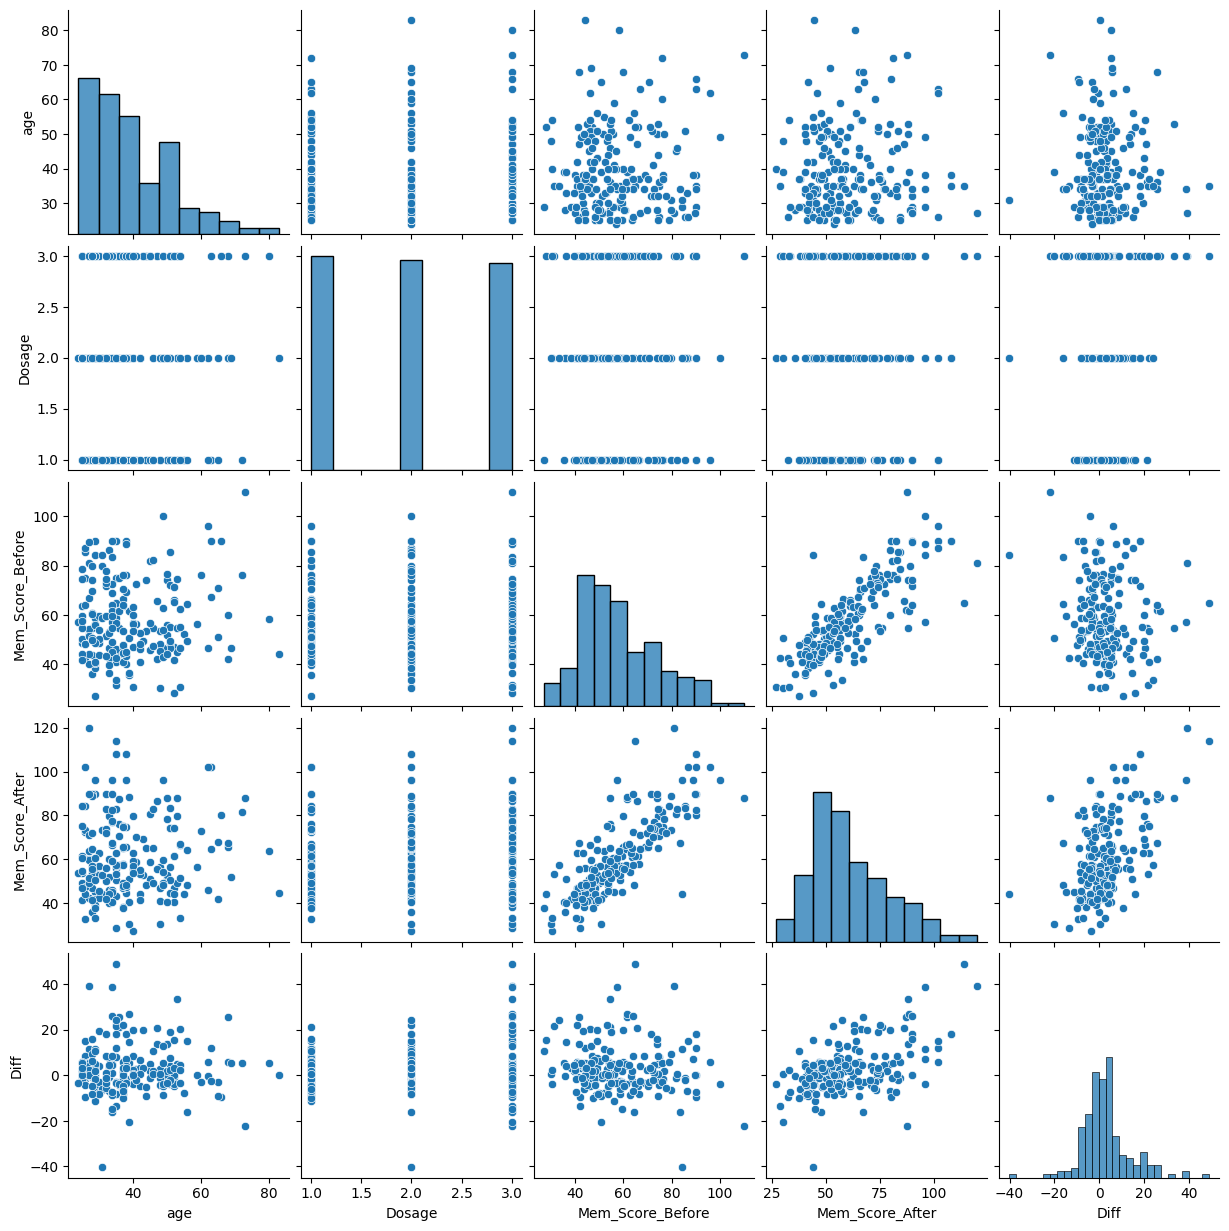

In [17]:
sns.pairplot(islander_data)

c:\Users\jocef\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


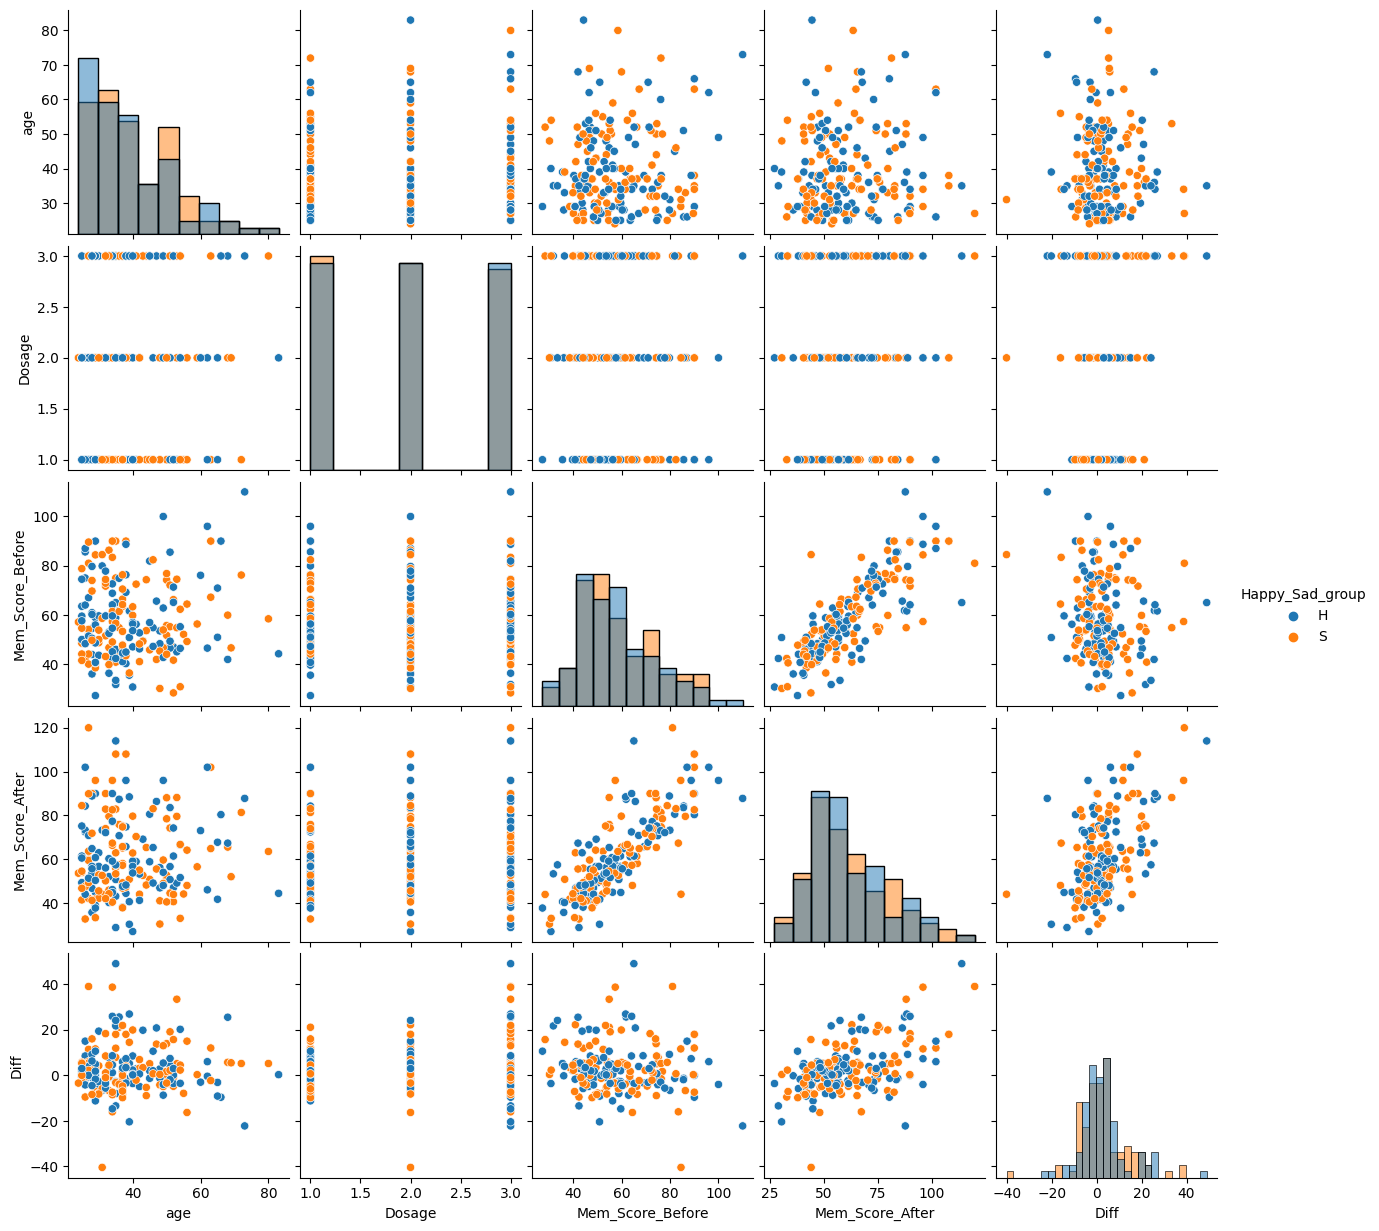

In [18]:
sns.pairplot(islander_data, hue='Happy_Sad_group', diag_kind='hist')

<Axes: ylabel='Diff'>

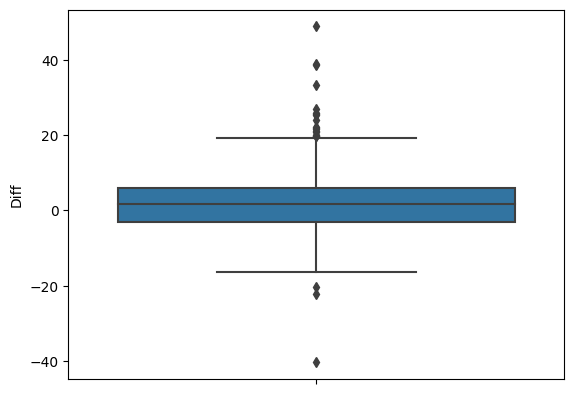

In [19]:
sns.boxplot(data = islander_data, y = 'Diff')

<Axes: >

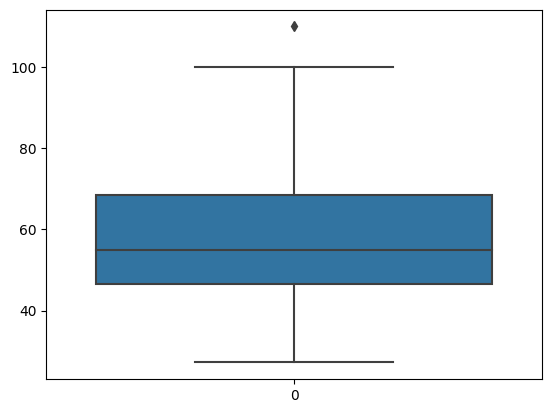

In [20]:
sns.boxplot(islander_data.Mem_Score_Before)

<Axes: xlabel='Happy_Sad_group', ylabel='Mem_Score_Before'>

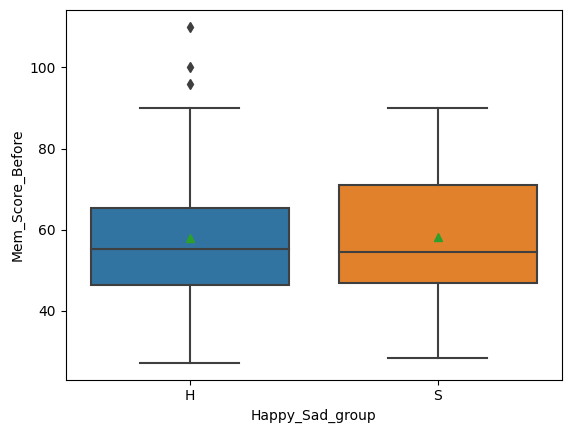

In [21]:
sns.boxplot(data= islander_data, y='Mem_Score_Before', x='Happy_Sad_group', showmeans=True)

<Axes: >

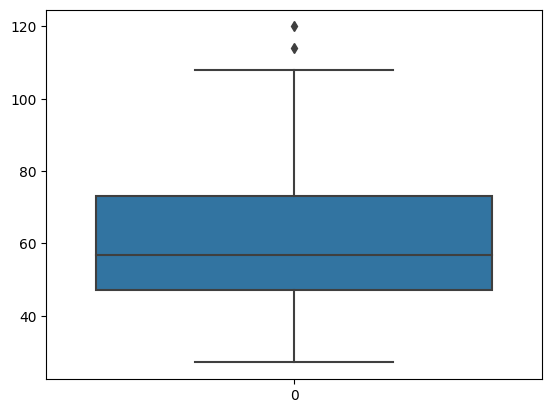

In [22]:
sns.boxplot(islander_data.Mem_Score_After)

<Axes: xlabel='Drug', ylabel='Diff'>

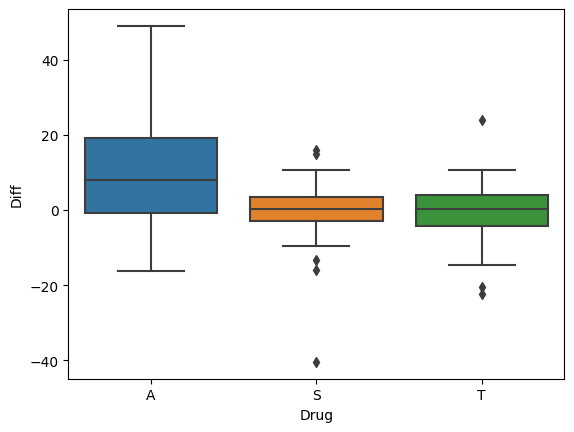

In [23]:
sns.boxplot(x=islander_data['Drug'], y=islander_data['Diff'])

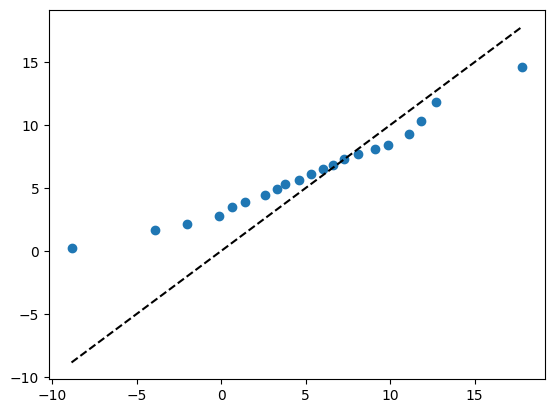

In [24]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.normal(5,5,250)
Y = np.random.rayleigh(5,250)

percs = np.linspace(0,100,21)
qn_a = np.percentile(X, percs)
qn_b = np.percentile(Y, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

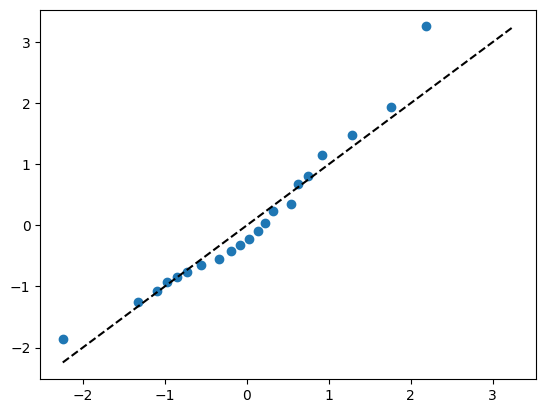

In [25]:

X = np.random.normal(0,1,len(islander_data))
Y = (islander_data.Mem_Score_After - islander_data.Mem_Score_After.mean()) / islander_data.Mem_Score_After.std()

percs = np.linspace(0,100,21)
qn_a = np.percentile(X, percs)
qn_b = np.percentile(Y, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

In [26]:
from scipy.stats import probplot

Datasets  AER Credit Card

In [27]:
import pandas as pd

df_credit_card = pd.read_csv('../clase_3/notebooks/data/AER_credit_card_data.csv')


In [28]:
df_credit_card.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [29]:
NUMERICAL_COLUMNS = ['share', 'expenditure', 'dependents', 'months', 'active']
CATEGORICAL_COLUMNS = ['owner', 'selfemp', 'reports', 'majorcards']

TARGET_COLUMN = ['card']

In [30]:
df_credit_card[NUMERICAL_COLUMNS].describe()

,share,expenditure,dependents,months,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.068732,185.057071,0.993935,55.267627,6.996967
std,0.094656,272.218917,1.247745,66.271746,6.305812
min,0.000109,0.000000,0.000000,0.000000,0.000000
25%,0.002316,4.583333,0.000000,12.000000,2.000000
50%,0.038827,101.298300,1.000000,30.000000,6.000000
75%,0.093617,249.035800,2.000000,72.000000,11.000000
max,0.906320,3099.505000,6.000000,540.000000,46.000000


In [31]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [32]:
df_credit_card['card'].value_counts()

card
yes    1023
no      296
Name: count, dtype: int64

In [34]:
# Creo un diccionario para mapear valores
diccionario = {'yes': True, 'no': False}

df_credit_card['card'] = df_credit_card['card'].map(diccionario)



In [35]:
df_credit_card

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,True,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,True,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,True,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,True,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,True,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,True,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,False,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,True,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,True,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [36]:
df_credit_card['card'].value_counts()

card
True     1023
False     296
Name: count, dtype: int64

In [37]:
# Media de cada columna numerica
df_credit_card[NUMERICAL_COLUMNS + TARGET_COLUMN].mean() 

share            0.068732
expenditure    185.057071
dependents       0.993935
months          55.267627
active           6.996967
card             0.775588
dtype: float64

In [39]:
# Desviacion estandar de cada columna numerica 
df_credit_card[NUMERICAL_COLUMNS + TARGET_COLUMN].std() 

share            0.094656
expenditure    272.218917
dependents       1.247745
months          66.271746
active           6.305812
card             0.417353
dtype: float64

In [44]:
# Mediana de cada columna numerica y target
df_credit_card[NUMERICAL_COLUMNS + TARGET_COLUMN].median() 

share            0.038827
expenditure    101.298300
dependents       1.000000
months          30.000000
active           6.000000
card             1.000000
dtype: float64

In [40]:
# Covarianza de cada columna numerica y la columna target
cov_mat = df_credit_card[NUMERICAL_COLUMNS + TARGET_COLUMN].cov() 

In [41]:
cov_mat

,share,expenditure,dependents,months,active,card
share,0.008960,21.612857,-0.009758,-0.347195,-0.014011,0.015329
expenditure,21.612857,74103.139042,17.887862,-523.291266,93.937520,41.560617
dependents,-0.009758,17.887862,1.556868,3.846086,0.842925,-0.018813
months,-0.347195,-523.291266,3.846086,4391.944255,41.801267,-0.007422
active,-0.014011,93.937520,0.842925,41.801267,39.763268,0.211762
card,0.015329,41.560617,-0.018813,-0.007422,0.211762,0.174184


In [42]:
# Correlacion de cada columna numerica y la columna target
corr_mat = df_credit_card[NUMERICAL_COLUMNS + TARGET_COLUMN].corr() 

In [43]:
corr_mat

,share,expenditure,dependents,months,active,card
share,1.000000,0.838779,-0.082618,-0.055348,-0.023474,0.388028
expenditure,0.838779,1.000000,0.052664,-0.029007,0.054724,0.365814
dependents,-0.082618,0.052664,1.000000,0.046512,0.107133,-0.036126
months,-0.055348,-0.029007,0.046512,1.000000,0.100028,-0.000268
active,-0.023474,0.054724,0.107133,0.100028,1.000000,0.080464
card,0.388028,0.365814,-0.036126,-0.000268,0.080464,1.000000


In [45]:
# Cantidad de valores unicos, valor mas frecuente y cantidad de veces que aparece
df_credit_card[CATEGORICAL_COLUMNS].describe() 

,reports,majorcards
count,1319.000000,1319.000000
mean,0.456406,0.817286
std,1.345267,0.386579
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,14.000000,1.000000


In [50]:
df_credit_card[CATEGORICAL_COLUMNS].mode() # Moda de cada columna categorica

,owner,selfemp,reports,majorcards
0,no,no,0,1


In [51]:
df_credit_card[NUMERICAL_COLUMNS].mode() # Moda de cada columna numerica

,share,expenditure,dependents,months,active
0,0.00048,0.0,0,12,0


In [52]:
df_credit_card.mode() # Moda de cada columna

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,True,0,28.16667,3.0,0.00048,0.0,no,no,0,12,1,0


In [54]:
# Calculo de la asimetria de cada columna numerica o sea el sesgo
df_cc_skew = df_credit_card.skew(numeric_only=True) # Asimetria de cada columna numerica 

In [55]:
df_cc_skew

card          -1.322650
reports        4.884221
age            0.841428
income         1.928085
share          3.167606
expenditure    3.720321
dependents     1.234275
months         2.570304
majorcards    -1.644000
active         1.213365
dtype: float64

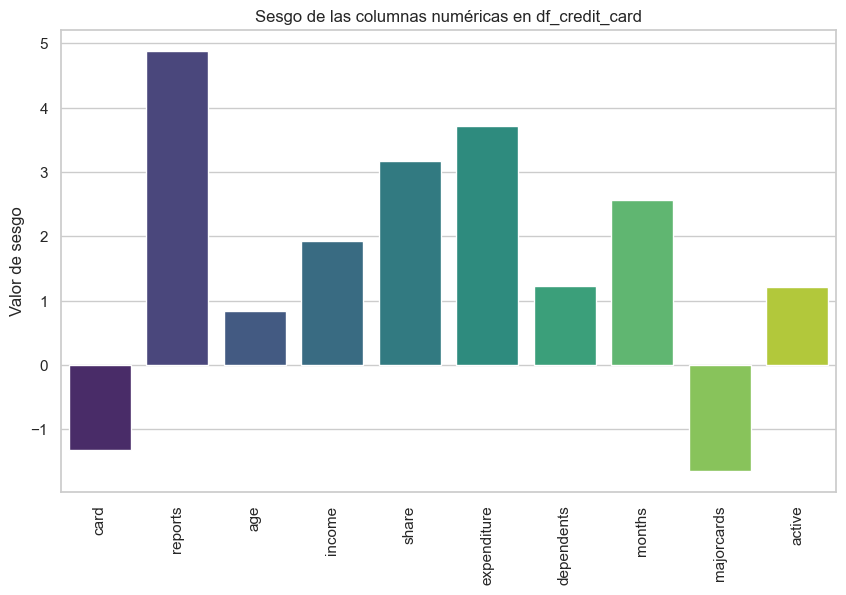

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=df_skew.index, y=df_skew.values, palette="viridis")

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Sesgo de las columnas numéricas en df_credit_card')
plt.ylabel('Valor de sesgo')

# Mostrar el gráfico
plt.show()


In [67]:
df_cc_kurt = df_credit_card.kurt(numeric_only=True) # Curtosis de cada columna numerica

In [68]:
df_cc_kurt

card           -0.250979
reports        30.556681
age             1.472542
income          4.933327
share          16.253759
expenditure    22.281899
dependents      1.092424
months          9.478653
majorcards      0.703802
active          2.358621
dtype: float64

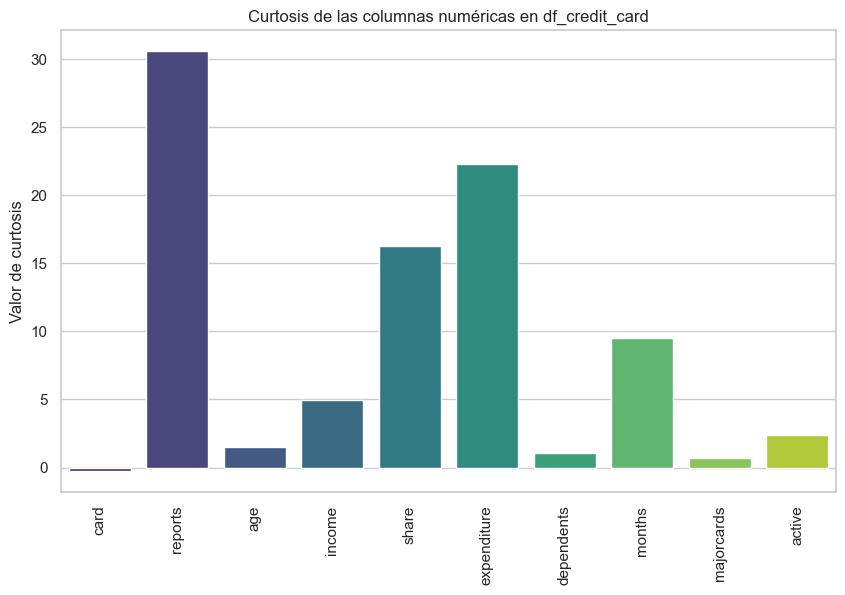

In [69]:
# Grafico kurtosis
# Crear un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=df_cc_kurt.index, y=df_cc_kurt.values, palette="viridis")

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Curtosis de las columnas numéricas en df_credit_card')
plt.ylabel('Valor de curtosis')

# Mostrar el gráfico
plt.show()

c:\Users\jocef\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


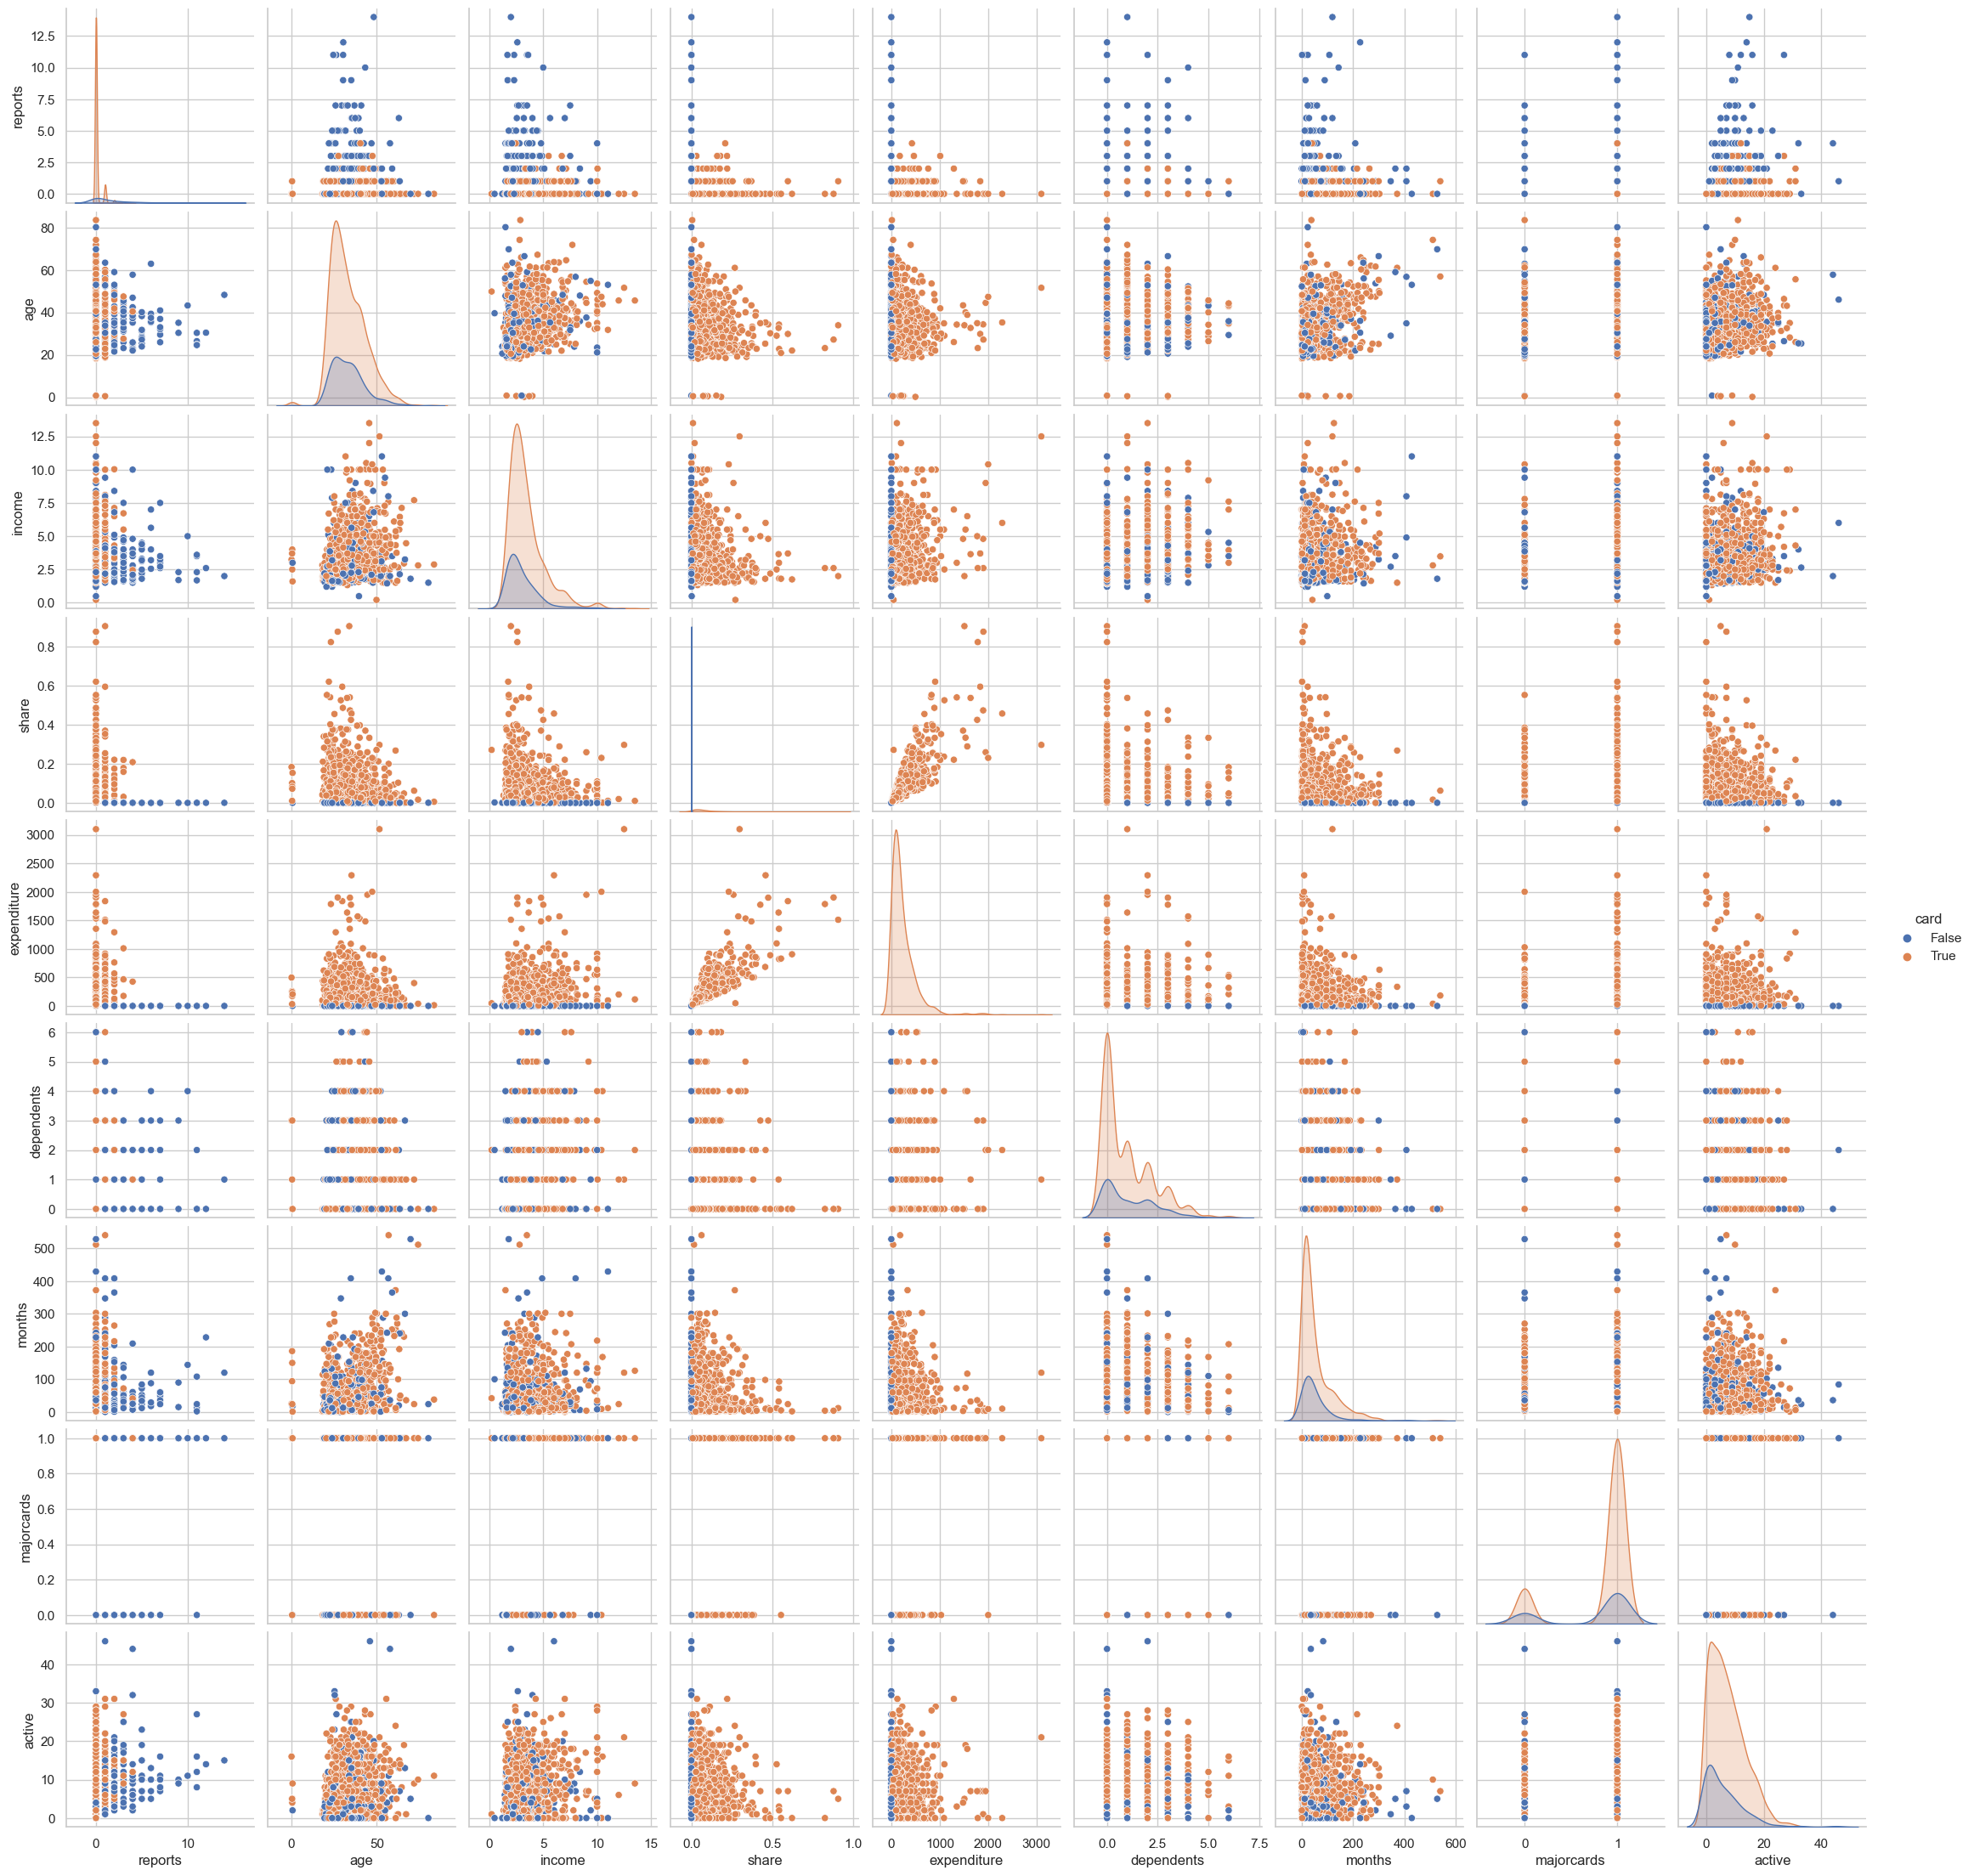

In [71]:
sns.pairplot(df_credit_card, hue="card") # Grafico de pares de las columnas numericas

<Axes: ylabel='share'>

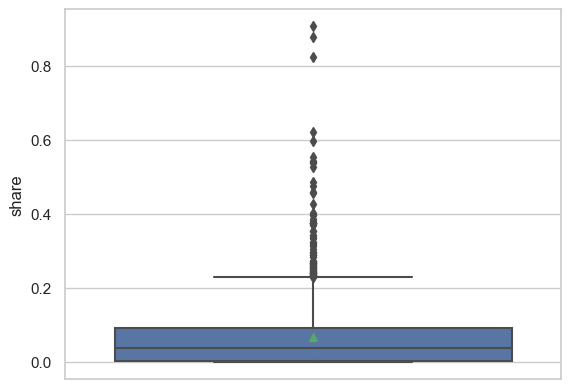

In [73]:
sns.boxplot(data=df_credit_card, y='share', showmeans=True) # Grafico de caja de la columna share